# data proprecessing

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
#from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

In [5]:
import tensorflow as tf

In [6]:
path = "data/restaurant_review/Restaurant_reviews_final.csv"
df = pd.read_csv(path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    9954 non-null   object 
 1   Reviewer      9954 non-null   object 
 2   Review        9954 non-null   object 
 3   Rating        9954 non-null   float64
 4   Metadata      9954 non-null   object 
 5   Time          9954 non-null   object 
 6   Pictures      9954 non-null   int64  
 7   Review_clean  9885 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 622.3+ KB


In [8]:
df["Rating"].value_counts()

Rating
1.0    7507
0.0    2447
Name: count, dtype: int64

### Target encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Rating'])

df['Rating_encoded'] = le.transform(df['Rating'])
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean,Rating_encoded
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,effective place helpful food quite chill frien...,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,evening food pleasant good ambience prompt ser...,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,background must try food great amazing ambienc...,1
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,sincerity course place food great behavior wou...,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food also order mutton thanks good ambience go...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9954 non-null   object 
 1   Reviewer        9954 non-null   object 
 2   Review          9954 non-null   object 
 3   Rating          9954 non-null   float64
 4   Metadata        9954 non-null   object 
 5   Time            9954 non-null   object 
 6   Pictures        9954 non-null   int64  
 7   Review_clean    9885 non-null   object 
 8   Rating_encoded  9954 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 700.0+ KB


### Tokens visualization

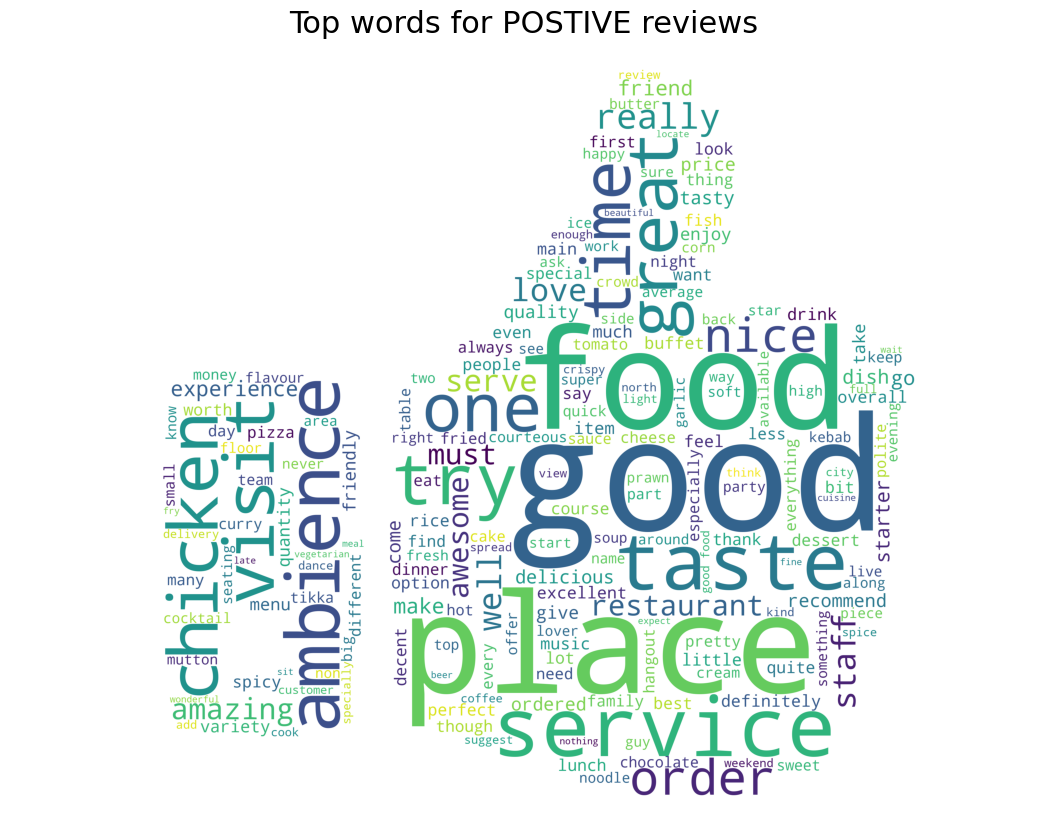

In [17]:
upvote = np.array(Image.open('data/restaurant_review/upvote.png'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=upvote
)
wc.generate(' '.join(map(str, [text for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']])))
plt.figure(figsize=(18,10))
plt.title('Top words for POSTIVE reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

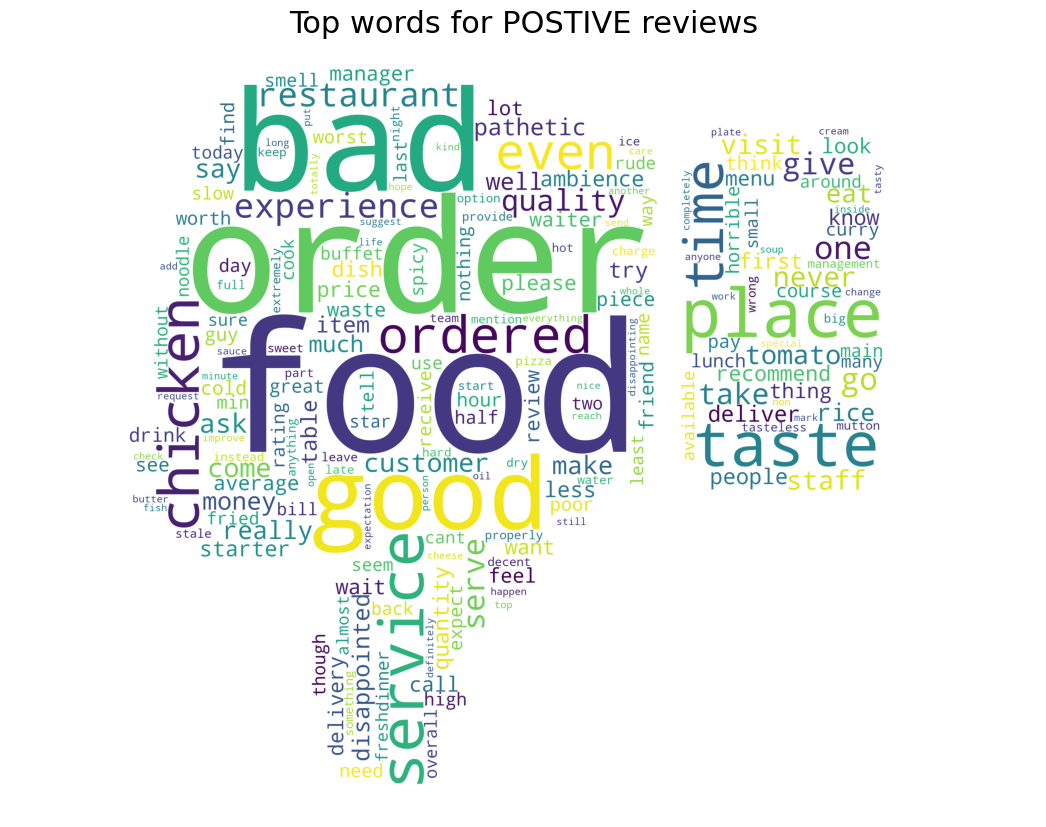

In [19]:
downvote = np.array(Image.open('data/restaurant_review/downvote.png'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=downvote
)
wc.generate(' '.join(map(str, [text for text in df.loc[df['Rating_encoded'] == 0, 'Review_clean']])))
plt.figure(figsize=(18,10))
plt.title('Top words for POSTIVE reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [23]:
# remove nan columns in the Review_clean
df = df.dropna(subset=['Review_clean'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9885 entries, 0 to 9953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9885 non-null   object 
 1   Reviewer        9885 non-null   object 
 2   Review          9885 non-null   object 
 3   Rating          9885 non-null   float64
 4   Metadata        9885 non-null   object 
 5   Time            9885 non-null   object 
 6   Pictures        9885 non-null   int64  
 7   Review_clean    9885 non-null   object 
 8   Rating_encoded  9885 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 772.3+ KB


### Vectorization

In [24]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['Review_clean']
y = df['Rating_encoded']

print(len(x), len(y))

9885 9885


In [25]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7413 7413
2472 2472


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [27]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Tunning CountVectorizer

In [28]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2),
                              min_df=0.1, max_df=0.7, max_features=100)

### TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7413x6651 sparse matrix of type '<class 'numpy.float64'>'
	with 145033 stored elements in Compressed Sparse Row format>

Word Embeddings: GloVe

In [30]:
texts = df['Review_clean']
target = df['Rating_encoded']

In [31]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

7380

Pad_sequences

In [32]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

In [33]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequence, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]])

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kwokt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[1561,    3,  356, ...,    0,    0,    0],
       [ 171,    2,  440, ...,    0,    0,    0],
       [1257,   35,   12, ...,    0,    0,    0],
       ...,
       [1250,  238,   26, ...,    0,    0,    0],
       [1163,  192,  693, ...,    0,    0,    0],
       [  12,   50,  308, ...,    0,    0,    0]])

### GloVe

In [38]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('model/glove.6B.100d.txt', "r", encoding="utf-8") as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [39]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.030769  ,  0.11993   ,  0.53908998, ..., -0.52877998,
         0.17584001,  1.06500006],
       [-0.16486   ,  0.91996998,  0.22736999, ..., -0.067904  ,
         1.5072    ,  0.60889   ],
       ...,
       [-0.31147   ,  0.84126002, -0.73078001, ..., -0.22547001,
         0.61804998,  0.1       ],
       [ 0.18892001, -0.41179001,  0.13657001, ...,  0.13456   ,
        -0.25046   , -0.22363   ],
       [-0.46597999,  0.66372001,  1.17540002, ..., -0.60641998,
        -0.60777003, -0.087452  ]])

## Modeling

In [40]:
import plotly.figure_factory as ff

x_axes = ['positive', 'negative']
y_axes =  ['negative', 'positive']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [41]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

### Naive Bayes DTM

In [42]:
# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [43]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.8988673139158576


In [44]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.941270535020535

### Naive Bayes

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [46]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.8434466019417476


### XGBoost

In [47]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [48]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9229731552677728
Test: 0.8697411003236246


### LSTM

In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.25
)

In [50]:

def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights = [embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences = True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 251, 100)          738000    
                                                                 
 bidirectional (Bidirectiona  (None, 251, 502)         706816    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 502)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 502)              2008      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 502)               0         
                                                        

In [51]:
# Load the model and train
# use GPU for training
with tf.device('/device:GPU:0'):
    

    model = glove_lstm()

    checkpoint = ModelCheckpoint(
        'model.h5',
        monitor = 'val_loss',
        verbose = 1,
        save_best_only = True
    )
    reduce_lr = ReduceLROnPlateau(
        monitor = 'val_loss',
        factor = 0.2,
        verbose = 1,
        patience = 5,
        min_lr = 0.001
    )
    history = model.fit(
        X_train,
        y_train,
        epochs = 7,
        batch_size = 32,
        validation_data = (X_test, y_test),
        verbose = 1,
        callbacks = [reduce_lr, checkpoint]
    )

Epoch 1/7
232/232 [==============================] - ETA: 0s - loss: 0.4411 - accuracy: 0.8223
Epoch 1: val_loss improved from inf to 0.42794, saving model to model.h5
232/232 [==============================] - 305s 1s/step - loss: 0.4411 - accuracy: 0.8223 - val_loss: 0.4279 - val_accuracy: 0.7828 - lr: 0.0010
Epoch 2/7
232/232 [==============================] - ETA: 0s - loss: 0.3109 - accuracy: 0.8778
Epoch 2: val_loss did not improve from 0.42794
232/232 [==============================] - 303s 1s/step - loss: 0.3109 - accuracy: 0.8778 - val_loss: 0.9657 - val_accuracy: 0.7751 - lr: 0.0010
Epoch 3/7
232/232 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8876
Epoch 3: val_loss did not improve from 0.42794
232/232 [==============================] - 579s 3s/step - loss: 0.2776 - accuracy: 0.8876 - val_loss: 0.6134 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 4/7
232/232 [==============================] - ETA: 0s - loss: 0.2555 - accuracy: 0.8982
Epoch 4: val_loss 

In [ ]:
# export the model to a file
model.save('model/model_lstm.h5')

In [52]:
import matplotlib.pyplot as plt

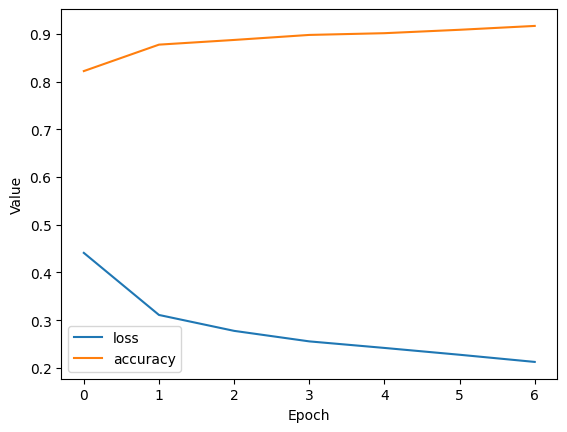

In [53]:
def plot_learning_curves(history, metrics):
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_learning_curves(history, ['loss', 'accuracy'])

In [54]:
y_preds = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix(metrics.confusion_matrix(y_test, y_preds))

78/78 [==============================] - 10s 122ms/step


### Results

In [63]:
# 获取模型层的权重
weights = model.get_weights()

# 打印每一层的权重信息
for i in range(len(weights)):
    print("Layer", i+1, "weights shape:", weights[i].shape)
    
index_word_reverse = {index: word for word, index in word_tokenizer.word_index.items()}

import numpy as np

# 计算每个词的重要性
feature_importance = np.sum(np.abs(embedding_matrix), axis=1)

# 打印前几个具有最大重要性的词
num_top_features = 20
top_indices = np.argsort(feature_importance)[::-1][:num_top_features]
top_features = [index_word_reverse[i] for i in top_indices]

print("Top", num_top_features, "features:")
for i, feature in enumerate(top_features, 1):
    print(i, ":", feature)

Layer 1 weights shape: (7380, 100)
Layer 2 weights shape: (100, 1004)
Layer 3 weights shape: (251, 1004)
Layer 4 weights shape: (1004,)
Layer 5 weights shape: (100, 1004)
Layer 6 weights shape: (251, 1004)
Layer 7 weights shape: (1004,)
Layer 8 weights shape: (502,)
Layer 9 weights shape: (502,)
Layer 10 weights shape: (502,)
Layer 11 weights shape: (502,)
Layer 12 weights shape: (502, 251)
Layer 13 weights shape: (251,)
Layer 14 weights shape: (251, 251)
Layer 15 weights shape: (251,)
Layer 16 weights shape: (251, 1)
Layer 17 weights shape: (1,)
Top 20 features:
1 : herein
2 : expander
3 : okrug
4 : dah
5 : saucepan
6 : foodstuff
7 : yen
8 : tablespoon
9 : sodium
10 : species
11 : telegram
12 : kinase
13 : county
14 : river
15 : vowel
16 : million
17 : cup
18 : gallon
19 : protein
20 : province


In [64]:
print("Top", num_top_features, "features:")
for i, feature in enumerate(top_features, 1):
    print(i, ":", feature)

Top 20 features:
1 : herein
2 : expander
3 : okrug
4 : dah
5 : saucepan
6 : foodstuff
7 : yen
8 : tablespoon
9 : sodium
10 : species
11 : telegram
12 : kinase
13 : county
14 : river
15 : vowel
16 : million
17 : cup
18 : gallon
19 : protein
20 : province
